# Multi dimensional matrix profile

https://stumpy.readthedocs.io/en/latest/Tutorial_Multidimensional_Motif_Discovery.html#A-Quick-1-Dimensional-Exploration

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import stumpy
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [20, 6]  # width, height
plt.rcParams['xtick.direction'] = 'out'

In [4]:
df = pd.read_csv("https://zenodo.org/record/4328047/files/toy.csv?download=1")
df.head()

,T1,T2,T3
0,0.565117,0.637180,0.741822
1,0.493513,0.629415,0.739731
2,0.469350,0.539220,0.718757
3,0.444100,0.577670,0.730169
4,0.373008,0.570180,0.752406


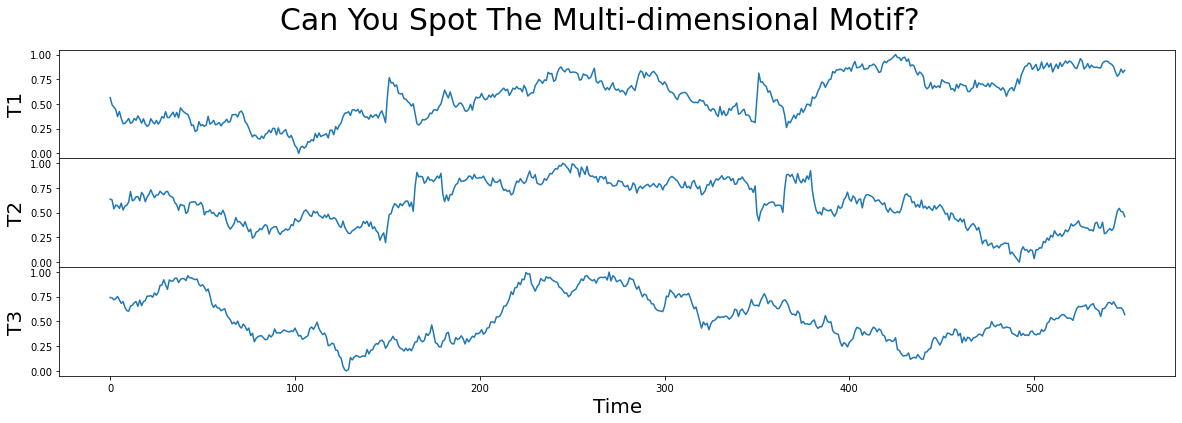

In [6]:
fig, axs = plt.subplots(df.shape[1], sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Can You Spot The Multi-dimensional Motif?', fontsize='30')

for i in range(df.shape[1]):
    axs[i].set_ylabel(f'T{i + 1}', fontsize='20')
    axs[i].set_xlabel('Time', fontsize ='20')
    axs[i].plot(df[f'T{i + 1}'])

plt.show()

In [7]:
m = 30
mps = {}  # Store the 1-dimensional matrix profiles
motifs_idx = {}  # Store the index locations for each pair of 1-dimensional motifs (i.e., the index location of two smallest matrix profile values within each dimension)
for dim_name in df.columns:
    mps[dim_name] = stumpy.stump(df[dim_name], m)
    motif_distance = np.round(mps[dim_name][:, 0].min(), 1)
    print(f"The motif pair matrix profile value in {dim_name} is {motif_distance}")
    motifs_idx[dim_name] = np.argsort(mps[dim_name][:, 0])[:2]

The motif pair matrix profile value in T1 is 1.1
The motif pair matrix profile value in T2 is 1.0
The motif pair matrix profile value in T3 is 1.1


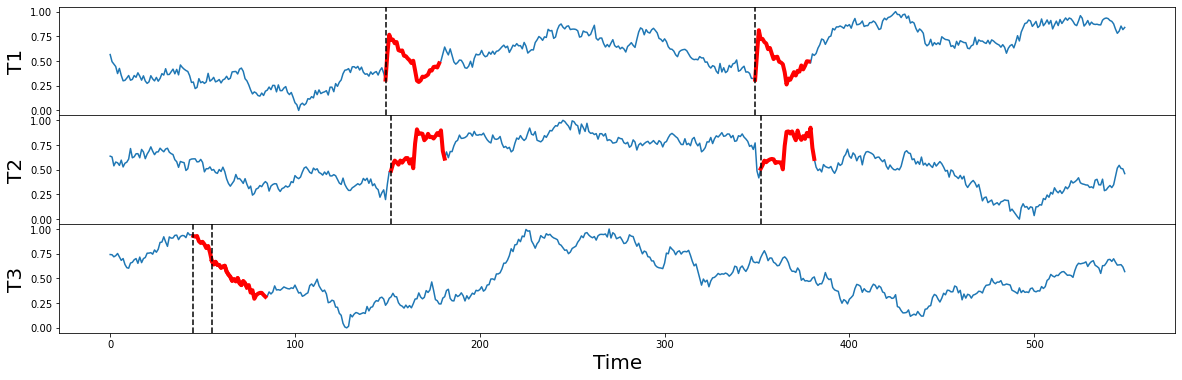

In [8]:
fig, axs = plt.subplots(len(mps), sharex=True, gridspec_kw={'hspace': 0})

for i, dim_name in enumerate(list(mps.keys())):
    axs[i].set_ylabel(dim_name, fontsize='20')
    axs[i].plot(df[dim_name])
    axs[i].set_xlabel('Time', fontsize ='20')
    for idx in motifs_idx[dim_name]:
        axs[i].plot(df[dim_name].iloc[idx:idx+m], c='red', linewidth=4)
        axs[i].axvline(x=idx, linestyle="dashed", c='black')

plt.show()

In [14]:
df.shape

(550, 3)

In [13]:
mps, indices = stumpy.mstump(df, m)

mps.shape

(3, 521)

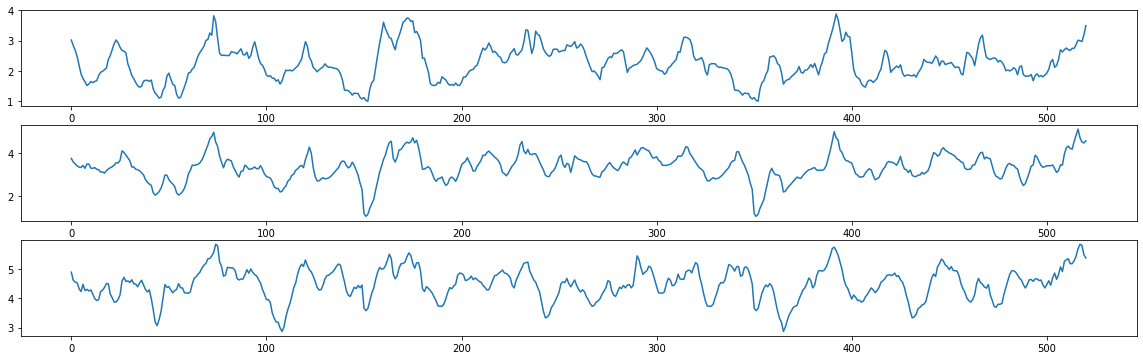

In [49]:
fig, axs = plt.subplots(3)
axs[0].plot(mps[0, :])
axs[1].plot(mps[1, :])
axs[2].plot(mps[2, :])

In [52]:
print(np.argsort(mps[0, :])[:10])
print(np.sort(mps[0,:])[:10])

[352 152 351 151 349 149  55  45 350 150]
[0.99664316 0.99664316 1.02501112 1.02501112 1.06999841 1.06999841
 1.09917401 1.09917401 1.11918018 1.11918018]


In [57]:
print(np.argsort(mps[1,:])[:10])
print(np.sort(mps[1,:])[:10])

[351 151 352 152 350 150 353 153 354 154]
[1.07050041 1.07050041 1.16734916 1.16734916 1.20320427 1.20320427
 1.444083   1.444083   1.65061811 1.65061811]


In [59]:
print(np.argsort(mps[2,:])[:10])
print(np.sort(mps[2,:])[:10])

[108 365 107 366 109  44 364 106  43 105]
[2.8668215  2.8668215  2.98826149 3.02059659 3.02059659 3.06765918
 3.17485378 3.18020451 3.18020451 3.18996618]


In [72]:
indices[1, 152]

352

In [80]:
indices[:, 100] # para una dimension el mejor match esta en el indice 32, para 2 dimensiones, el mejor match esta en el 371, y para 3 dim en 367

array([ 32, 371, 367])

In [33]:
np.argsort(mps, axis=1)

array([[352, 152, 351, ..., 172,  73, 392],
       [351, 151, 352, ...,  73, 391, 516],
       [108, 365, 107, ..., 518, 517,  74]])

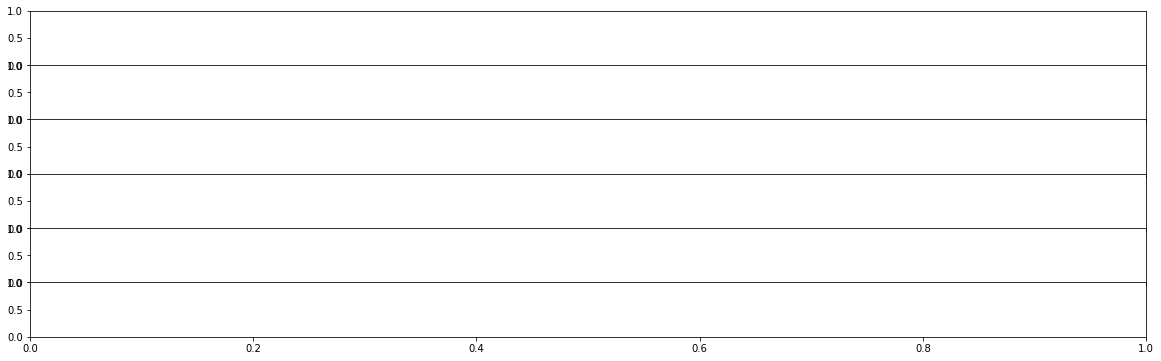

In [69]:
fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0})



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

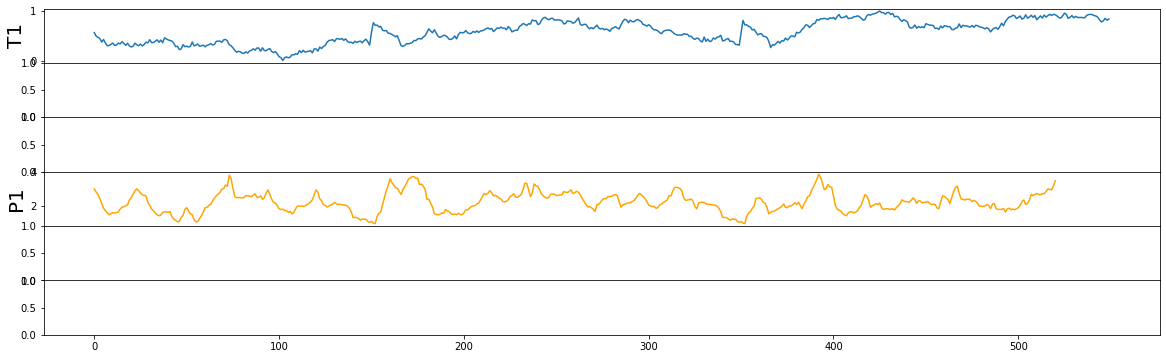

In [68]:
fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0})

dim = 2 
motifs_idx = np.argsort(mps[dim, :])

for k, dim_name in enumerate(df.columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(df[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')

    axs[k + mps.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='20')
    axs[k + mps.shape[0]].plot(mps[k], c='orange')
    axs[k + mps.shape[0]].set_xlabel('Time', fontsize ='20')

    axs[k].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    axs[k].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')


    axs[k + mps.shape[0]].plot(motifs_idx[k, 0], mps[k, motifs_idx[k, 0]] + 1, marker="v", markersize=10, color='black')
    axs[k + mps.shape[0]].plot(motifs_idx[k, 1], mps[k, motifs_idx[k, 1]] + 1, marker="v", markersize=10, color='black')

    # axs[k].plot(range(motifs_idx[k, 0], motifs_idx[k, 0] + m), df[dim_name].iloc[motifs_idx[k, 0] : motifs_idx[k, 0] + m], c='red', linewidth=4)
    # axs[k].plot(range(motifs_idx[k, 1], motifs_idx[k, 1] + m), df[dim_name].iloc[motifs_idx[k, 1] : motifs_idx[k, 1] + m], c='red', linewidth=4)

plt.show()

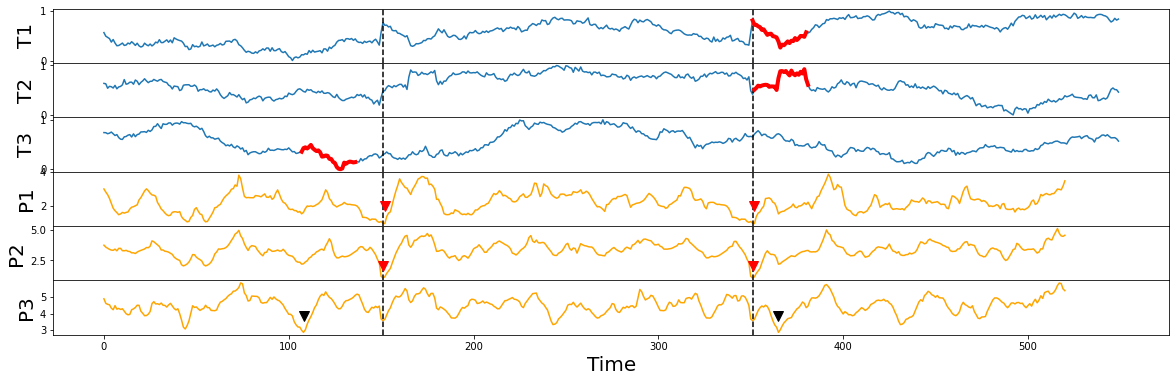

In [64]:
fig, axs = plt.subplots(mps.shape[0] * 2, sharex=True, gridspec_kw={'hspace': 0})

for k, dim_name in enumerate(df.columns):
    axs[k].set_ylabel(dim_name, fontsize='20')
    axs[k].plot(df[dim_name])
    axs[k].set_xlabel('Time', fontsize ='20')

    axs[k + mps.shape[0]].set_ylabel(dim_name.replace('T', 'P'), fontsize='20')
    axs[k + mps.shape[0]].plot(mps[k], c='orange')
    axs[k + mps.shape[0]].set_xlabel('Time', fontsize ='20')

    axs[k].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    axs[k].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 0], linestyle="dashed", c='black')
    axs[k + mps.shape[0]].axvline(x=motifs_idx[1, 1], linestyle="dashed", c='black')

    if dim_name != 'T3':
        axs[k + mps.shape[0]].plot(motifs_idx[k, 0], mps[k, motifs_idx[k, 0]] + 1, marker="v", markersize=10, color='red')
        axs[k + mps.shape[0]].plot(motifs_idx[k, 1], mps[k, motifs_idx[k, 1]] + 1, marker="v", markersize=10, color='red')
    else:
        axs[k + mps.shape[0]].plot(motifs_idx[k, 0], mps[k, motifs_idx[k, 0]] + 1, marker="v", markersize=10, color='black')
        axs[k + mps.shape[0]].plot(motifs_idx[k, 1], mps[k, motifs_idx[k, 1]] + 1, marker="v", markersize=10, color='black')

    # axs[k].plot(range(motifs_idx[k, 0], motifs_idx[k, 0] + m), df[dim_name].iloc[motifs_idx[k, 0] : motifs_idx[k, 0] + m], c='red', linewidth=4)
    # axs[k].plot(range(motifs_idx[k, 1], motifs_idx[k, 1] + m), df[dim_name].iloc[motifs_idx[k, 1] : motifs_idx[k, 1] + m], c='red', linewidth=4)
    axs[k].plot(range(motifs_idx[k, 2], motifs_idx[k, 2] + m), df[dim_name].iloc[motifs_idx[k, 2] : motifs_idx[k, 2] + m], c='red', linewidth=4)

plt.show()